You are given a Twitter dataset in the form of a csv file that includes tweets classified by the human editors. In this project, please come up with a machine classifier that will replace the human editors. That means your classifier should correctly classify the individual tweets as Technology or not.<br> 
Data Source:<br>
https://drive.google.com/file/d/153Aw9XcU-2I7KL_UizEcbRsATnX698PJ/view?usp=share_link<br>
https://drive.google.com/file/d/13Tx0YAS-H-lwzaAbqd0-sTw1ib68khe_/view?usp=share_link


**Import the Necessary Dependencies**

In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# pd.set_option('display.max_rows', 5000)
# pd.set_option('display.max_columns', 5000)
# pd.set_option('display.width', 1000)

**Read and Load the Dataset**

In [2]:
tweet_df = pd.read_csv(r'D:\MACHINE LEARNING\Mentorship program\NLP Projects\NLP_Project_first\tweet_data.csv')

**Exploratory Data Analysis**

In [3]:
tweet_df.head()

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
0,1070867471245164544,2018-12-07 02:27:55,-1,-1,98,False,True,False,64,https://pbs.twimg.com/media/Dtx8SiIWkAImVsb.jpg,34,-1,The immediate impulse for an alliance of the E...,Business,23464532,5988062,The Economist,NaN
1,1070868017888837633,2018-12-07 02:30:05,-1,-1,13,False,True,False,10,https://pbs.twimg.com/media/Dtx8yTyW4AEciqP.jpg,3,-1,America's economy is flashing some warning sig...,Business,1732809,16184358,CNN Business,NaN
2,1070868012864028673,2018-12-07 02:30:04,-1,-1,12,False,True,False,8,NaN,4,-1,Lyft files for what is expected to be one of t...,Business,2253989,25053299,FORTUNE,NaN
3,1070867995239555075,2018-12-07 02:30:00,-1,-1,5,False,True,False,4,NaN,1,-1,"Exporters still waiting to get Rs 6,000 crore ...",Business,1704056,43855487,Business Standard,NaN
4,1070867995205885952,2018-12-07 02:30:00,-1,-1,5,False,True,False,2,NaN,3,-1,Ride-hailing firm Lyft races to leave Uber beh...,Business,1997662,15110357,Reuters Business,https://video.twimg.com/amplify_video/10708116...


In [4]:
tweet_df['topicName'].value_counts()

Business                    164602
News                        131973
Motivational                 84750
Technology                   47679
Design & Architecture        44987
Cryptocurrency               38623
Art                          36697
Interesting                  28615
Animal                       28202
Memes                        26349
Nature                       25021
Photography                  23638
DIY & Craft                  22392
Space                        14226
Funny                        13654
Travel                       13215
Random                       11825
Editorial Pics               11026
Flowers                       9450
Mindfulness                   2779
Fitness                       2454
Nanotech                       792
World Leaders                  663
Psychology                     544
US News                        279
science                        244
Stocks                         188
Humor                          154
Spirituality        

In [5]:
tweet_df=tweet_df[tweet_df['topicName']=='Technology']
tweet_df.columns

Index(['tweetID', 'crDate', 'edInput', 'editor', 'engages', 'isApproved',
       'isEdNeed', 'isRT', 'likes', 'photoUrl', 'retweets', 'rtUsID', 'text',
       'topicName', 'usFlwrs', 'usID', 'usName', 'videoUrl'],
      dtype='object')

In [6]:
tweet_df=tweet_df[['text','edInput']]

In [7]:
tweet_df['edInput'].value_counts()

-1    22235
 1    14652
 2     4965
 4     4761
 3     1066
Name: edInput, dtype: int64

In [8]:
tweet_df=tweet_df[(tweet_df['edInput'] != -1) & (tweet_df['edInput'] != 3) & (tweet_df['edInput'] != 4)]

In [9]:
tweet_df.reset_index(drop=True)

,text,edInput
0,This paper Boeing 777 puts all other paper air...,1
1,This long-range wireless charging system charg...,1
2,Elon Musk has created and sold multiple compan...,1
3,Honda's $4.9 million private jet is an absolut...,1
4,The US Marines pieced together this temporary ...,1
...,...,...
19612,"Tomorrow on @cheddar, my exclusive interview w...",2
19613,Netflix documentary The Great Hack turns the C...,2
19614,Hulu is developing a Hitchhiker’s Guide to the...,1
19615,This machine folds dumplings super fast. https...,1


In [10]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19617 entries, 60071 to 785452
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     19617 non-null  object
 1   edInput  19617 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 459.8+ KB


**Checking for null values**

In [11]:
# np.sum(tweet_df.isnull().any(axis=1))
tweet_df.isnull().sum()

text       0
edInput    0
dtype: int64

**Check unique target values**

In [12]:
tweet_df['edInput'].unique()

array([1, 2], dtype=int64)

**Check the number of target values**

In [13]:
tweet_df['edInput'].nunique()

2

In [14]:
tweet_df['edInput'] = tweet_df['edInput'].replace(2,0)

**Data Visualization of Target Variables**

In [15]:
tweet_df['edInput'].value_counts(normalize=True)

1    0.746903
0    0.253097
Name: edInput, dtype: float64

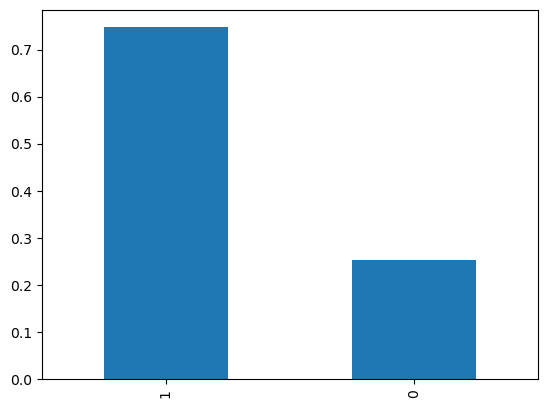

In [16]:
tweet_df['edInput'].value_counts(normalize=True).plot(kind='bar')
plt.show()

**Data Preprocessing**

In the above-given problem statement, before training the model, we performed various pre-processing steps on the dataset that mainly dealt with removing stopwords, removing special characters like emojis, hashtags, etc. The text document is then converted into lowercase for better generalization.
Subsequently, the punctuations were cleaned and removed, thereby reducing the unnecessary noise from the dataset. After that, we also removed the repeating characters from the words along with removing the URLs as they do not have any significant importance.
At last, we then performed Stemming(reducing the words to their derived stems) and Lemmatization(reducing the derived words to their root form, known as lemma) for better results.

**Making statement text in lowercase**

In [17]:
tweet_df['text']=tweet_df['text'].str.lower()
tweet_df['text'].head()

60071    this paper boeing 777 puts all other paper air...
60462    this long-range wireless charging system charg...
61260    elon musk has created and sold multiple compan...
61996    honda's $4.9 million private jet is an absolut...
64482    the us marines pieced together this temporary ...
Name: text, dtype: object

**Cleaning and removing punctuations**

In [18]:
import string
string.punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
tweet_df['text']=tweet_df['text'].apply(lambda x: remove_punctuation(x))
tweet_df['text'].head()

60071    this paper boeing 777 puts all other paper air...
60462    this longrange wireless charging system charge...
61260    elon musk has created and sold multiple compan...
61996    hondas 49 million private jet is an absolute g...
64482    the us marines pieced together this temporary ...
Name: text, dtype: object

**Cleaning and removing URLs**

In [19]:
tweet_df['text'] = tweet_df['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

**Cleaning and removing numeric numbers**

In [20]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
tweet_df['text']  = tweet_df['text'] .apply(lambda x: cleaning_numbers(x))
tweet_df['text'].head()

60071    this paper boeing  puts all other paper airpla...
60462    this longrange wireless charging system charge...
61260    elon musk has created and sold multiple compan...
61996    hondas  million private jet is an absolute gam...
64482    the us marines pieced together this temporary ...
Name: text, dtype: object

**Count the number of words present in a tweet**

In [21]:
def word_count(sentence):
    return len(sentence.split())
    
tweet_df['word count'] = tweet_df['text'].apply(word_count)
tweet_df.head()

,text,edInput,word count
60071,this paper boeing puts all other paper airpla...,1,10
60462,this longrange wireless charging system charge...,1,14
61260,elon musk has created and sold multiple compan...,1,8
61996,hondas million private jet is an absolute gam...,1,8
64482,the us marines pieced together this temporary ...,1,10


**Expand contractions in Text Processing**

In [22]:
import contractions
def expanded_text(sentence):
    return contractions.fix(sentence)
    
tweet_df['text'] = tweet_df['text'].apply(expanded_text)
tweet_df.head()

,text,edInput,word count
60071,this paper boeing puts all other paper airpla...,1,10
60462,this longrange wireless charging system charge...,1,14
61260,elon musk has created and sold multiple compan...,1,8
61996,hondas million private jet is an absolute gam...,1,8
64482,the us marines pieced together this temporary ...,1,10


In [23]:
from cleantext import clean
def clean_text(sentence):
    return clean(sentence, no_emoji=True)
    
tweet_df['text'] = tweet_df['text'].apply(clean_text)
tweet_df.head()

,text,edInput,word count
60071,this paper boeing puts all other paper airplan...,1,10
60462,this longrange wireless charging system charge...,1,14
61260,elon musk has created and sold multiple companies,1,8
61996,hondas million private jet is an absolute game...,1,8
64482,the us marines pieced together this temporary ...,1,10


**Remove the frequent words**

In [24]:
# from collections import Counter
# cnt = Counter()
# for text in tweet_df['text'].values:
#     for word in text.split():
#         cnt[word] += 1
# cnt.most_common(20)

In [25]:
# FREQWORDS = set([w for (w, wc) in cnt.most_common(20)])
# def remove_freqwords(text):
#     """custom function to remove the frequent words"""
#     return " ".join([word for word in str(text).split() if word not in FREQWORDS])
# tweet_df["text"] = tweet_df["text"].apply(lambda text: remove_freqwords(text))
# tweet_df.head()

**Remove the Less Frequent Words**

In [26]:
# n_rare_words = 20
# RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
# def remove_rarewords(text):
#     """custom function to remove the rare words"""
#     return " ".join([word for word in str(text).split() if word not in RAREWORDS])
# tweet_df["text"] = tweet_df["text"].apply(lambda text: remove_rarewords(text))
# tweet_df.head()

**Getting tokenization of tweet text**

In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priyambada\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
from nltk.tokenize import RegexpTokenizer 
tweet_df['text_tokenize']=tweet_df['text'].apply(lambda x: RegexpTokenizer(r'\w+').tokenize(x))
# tweet_df['text_tokenize']=tweet_df['text'].apply(lambda x: RegexpTokenizer(r'\w+').tokenize(x))
tweet_df.head()

,text,edInput,word count,text_tokenize
60071,this paper boeing puts all other paper airplan...,1,10,"[this, paper, boeing, puts, all, other, paper,..."
60462,this longrange wireless charging system charge...,1,14,"[this, longrange, wireless, charging, system, ..."
61260,elon musk has created and sold multiple companies,1,8,"[elon, musk, has, created, and, sold, multiple..."
61996,hondas million private jet is an absolute game...,1,8,"[hondas, million, private, jet, is, an, absolu..."
64482,the us marines pieced together this temporary ...,1,10,"[the, us, marines, pieced, together, this, tem..."


**Applying stemming**

In [30]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
tweet_df['text_stemmed'] = tweet_df['text_tokenize'].apply(lambda x: [stemmer.stem(y) for y in x])
# tweet_df['text_stemmed'] = tweet_df['text_tokenize'].apply(lambda x: [stemmer.stem(y) for y in x])
tweet_df.head()

,text,edInput,word count,text_tokenize,text_stemmed
60071,this paper boeing puts all other paper airplan...,1,10,"[this, paper, boeing, puts, all, other, paper,...","[this, paper, boe, put, all, other, paper, air..."
60462,this longrange wireless charging system charge...,1,14,"[this, longrange, wireless, charging, system, ...","[this, longrang, wireless, charg, system, char..."
61260,elon musk has created and sold multiple companies,1,8,"[elon, musk, has, created, and, sold, multiple...","[elon, musk, has, creat, and, sold, multipl, c..."
61996,hondas million private jet is an absolute game...,1,8,"[hondas, million, private, jet, is, an, absolu...","[honda, million, privat, jet, is, an, absolut,..."
64482,the us marines pieced together this temporary ...,1,10,"[the, us, marines, pieced, together, this, tem...","[the, us, marin, piec, togeth, this, temporari..."


In [31]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Priyambada\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

**Applying lemmatizer**

In [32]:
import nltk
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

tweet_df['text_lemmatized'] = tweet_df['text_tokenize'].apply(lemmatize_text)
tweet_df['text_lemmatized'] = tweet_df['text_lemmatized'].apply(' '.join)
tweet_df.head()

,text,edInput,word count,text_tokenize,text_stemmed,text_lemmatized
60071,this paper boeing puts all other paper airplan...,1,10,"[this, paper, boeing, puts, all, other, paper,...","[this, paper, boe, put, all, other, paper, air...",this paper boeing put all other paper airplane...
60462,this longrange wireless charging system charge...,1,14,"[this, longrange, wireless, charging, system, ...","[this, longrang, wireless, charg, system, char...",this longrange wireless charging system charge...
61260,elon musk has created and sold multiple companies,1,8,"[elon, musk, has, created, and, sold, multiple...","[elon, musk, has, creat, and, sold, multipl, c...",elon musk ha created and sold multiple company
61996,hondas million private jet is an absolute game...,1,8,"[hondas, million, private, jet, is, an, absolu...","[honda, million, privat, jet, is, an, absolut,...",hondas million private jet is an absolute game...
64482,the us marines pieced together this temporary ...,1,10,"[the, us, marines, pieced, together, this, tem...","[the, us, marin, piec, togeth, this, temporari...",the u marine pieced together this temporary br...


**Separating input feature and label**

In [33]:
y = tweet_df['edInput']
X = tweet_df['text_lemmatized']

**Splitting Our Data Into Train and Test Subsets**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

**Model 1**

**Compute the F-beta score**:The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0.The beta parameter represents the ratio of recall importance to precision importance. beta > 1 gives more weight to recall, while beta < 1 favors precision. For example, beta = 2 makes recall twice as important as precision, while beta = 0.5 does the opposite. Asymptotically, beta -> +inf considers only recall, and beta -> 0 only precision.

The make_scorer function wraps scoring functions for use in GridSearchCV and cross_val_score.

In [36]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=0.5)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(),LogisticRegression(max_iter=1000,class_weight='balanced'))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid_lr = GridSearchCV(pipe, param_grid, cv=5, scoring=ftwo_scorer)
grid_lr.fit(X_train, y_train)
grid_lr_preds=grid_lr.predict(X_test)
# print("Best cross-validation score:{:.2f}".format(grid_lr.best_score_))
# print("Best parameters:{}".format(grid_lr.best_params_))
# print("Model score:{:.2f}".format(grid_lr.score(X_test,y_test)))

In [38]:
lr_prob=grid_lr.predict_proba(X_test)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [40]:
confusion_matrix(y_test,grid_lr_preds)

array([[ 774,  219],
       [ 583, 2348]], dtype=int64)

In [41]:
print(classification_report(y_test,grid_lr_preds))

              precision    recall  f1-score   support

           0       0.57      0.78      0.66       993
           1       0.91      0.80      0.85      2931

    accuracy                           0.80      3924
   macro avg       0.74      0.79      0.76      3924
weighted avg       0.83      0.80      0.80      3924



C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


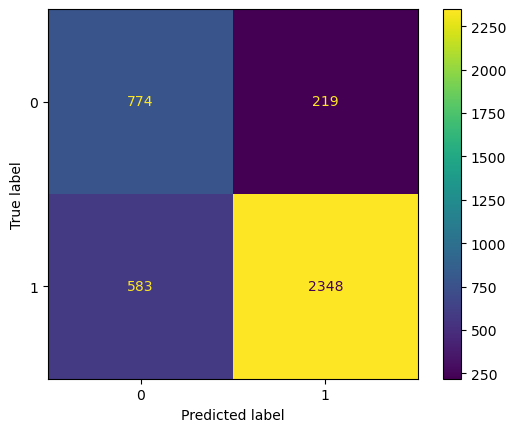

In [42]:
plot_confusion_matrix(grid_lr,X_test,y_test);

In [43]:
from sklearn import metrics
def TP_rate_visualization(y_test, lr_prob):
  precision, recall, thresholds = metrics.precision_recall_curve(y_test, lr_prob[:,1])
  FPR, TPR, thresholds = metrics.roc_curve(y_test, lr_prob[:,1])
  AUC = metrics.auc(FPR, TPR)
  AP = metrics.auc(recall, precision)
    
  

  plt.figure(figsize=(10,5))

  plt.subplot(1,2,1)
  plt.plot(FPR, TPR)
  plt.title('roc Curve')
  plt.title(f'AUC = {AUC: .3f}')
  plt.ylabel('True positive rate') # TP/(TP+FN)
  plt.xlabel('False positive rate') # FP/(FP+TN)

  plt.subplot(1,2,2)
  plt.plot(recall, precision)
  plt.title(f'AP = {AP: .3f}')
  plt.ylabel('Precision')
  plt.xlabel('Recall')

  plt.show()

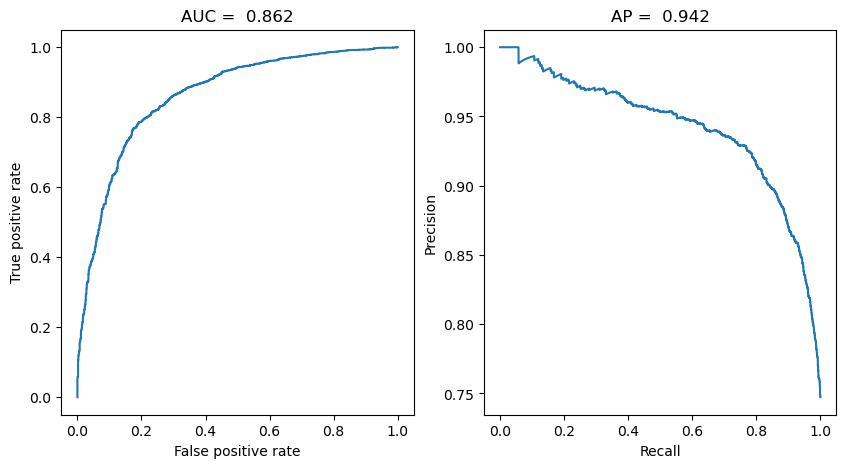

In [44]:
TP_rate_visualization(y_test, lr_prob)

In [45]:
FPR, TPR, thresholds = metrics.roc_curve(y_test, lr_prob[:,1])
frame={'FPR':FPR,'TPR':TPR,'thresholds':thresholds}
df=pd.DataFrame(frame)
df.head()

,FPR,TPR,thresholds
0,0.0,0.000000,1.998822
1,0.0,0.000341,0.998822
2,0.0,0.001024,0.995501
3,0.0,0.001706,0.995396
4,0.0,0.011600,0.985755


In [46]:
# lr_predict_class = [1 if prob > 0.5 else 0 for prob in lr_prob[:,1]]

In [47]:
# confusion_matrix(y_test,lr_predict_class)

In [48]:
# print(classification_report(y_test,lr_predict_class))

In [49]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, lr_prob[:,1])
precision=precision.tolist()
precision.pop()
recall=recall.tolist()
recall.pop()

0.0

In [50]:
frame={'Precision':precision,'Recall':recall,'Thresholds':thresholds}
df=pd.DataFrame(frame)
df

,Precision,Recall,Thresholds
0,0.747323,1.000000,0.034241
1,0.747258,0.999659,0.034792
2,0.747449,0.999659,0.037776
3,0.747640,0.999659,0.040337
4,0.747831,0.999659,0.040786
...,...,...,...
3481,1.000000,0.002047,0.995237
3482,1.000000,0.001706,0.995396
3483,1.000000,0.001024,0.995501
3484,1.000000,0.000682,0.996365


In [51]:
df['f1_score']= (2*(df['Precision'] * df['Recall']))/(df['Precision']+ df['Recall'])

In [52]:
dff=df.sort_values(by='f1_score')
dff


,Precision,Recall,Thresholds,f1_score
3485,1.000000,0.000341,0.998822,0.000682
3484,1.000000,0.000682,0.996365,0.001364
3483,1.000000,0.001024,0.995501,0.002045
3482,1.000000,0.001706,0.995396,0.003406
3481,1.000000,0.002047,0.995237,0.004086
...,...,...,...,...
624,0.858087,0.930399,0.321128,0.892781
622,0.857862,0.930740,0.320362,0.892816
548,0.848066,0.942682,0.301180,0.892874
625,0.858357,0.930399,0.321217,0.892927


In [53]:
lr_predict_class = [1 if prob > 0.4 else 0 for prob in lr_prob[:,1]]

In [54]:
confusion_matrix(y_test,lr_predict_class)

array([[ 655,  338],
       [ 344, 2587]], dtype=int64)

In [55]:
print(classification_report(y_test,lr_predict_class))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       993
           1       0.88      0.88      0.88      2931

    accuracy                           0.83      3924
   macro avg       0.77      0.77      0.77      3924
weighted avg       0.83      0.83      0.83      3924



In [56]:
from sklearn import metrics
precision, recall, thresholds =metrics.precision_recall_curve(y_test, lr_prob[:,1])
f1_scores = 2 * recall * precision / (recall + precision)
best_f1 = np.max(f1_scores)
best_thresh = thresholds[np.argmax(f1_scores)]

In [57]:
best_f1

0.892962356792144

In [58]:
best_thresh

0.32072504510911026

**Model 2**

In [59]:
from sklearn.utils import class_weight
sample = class_weight.compute_sample_weight('balanced', y_train)

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_tf = vectorizer.transform(X_train)
X_train_tf = X_train_tf.toarray()
X_test_tf = vectorizer.transform(X_test)
X_test_tf = X_test_tf.toarray()

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=0.1)
nb.fit(X_train_tf,y_train, sample_weight=sample)
predictions_NB = nb.predict(X_test_tf)

In [60]:
nb_prob=nb.predict_proba(X_test_tf)

C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


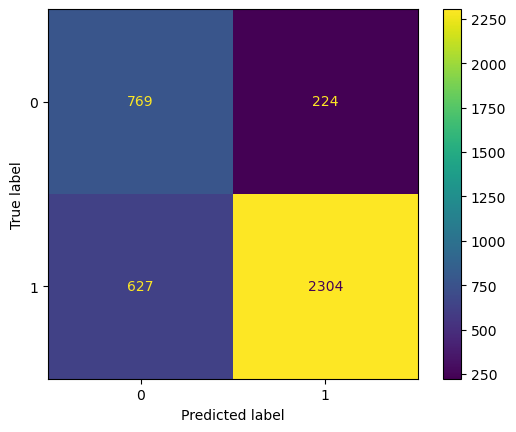

In [61]:
plot_confusion_matrix(nb,X_test_tf,y_test);

In [62]:
print(classification_report(y_test,predictions_NB ))

              precision    recall  f1-score   support

           0       0.55      0.77      0.64       993
           1       0.91      0.79      0.84      2931

    accuracy                           0.78      3924
   macro avg       0.73      0.78      0.74      3924
weighted avg       0.82      0.78      0.79      3924



In [63]:
from sklearn import metrics
def TP_rate_visualization(y_test, nb_prob):
  precision, recall, thresholds = metrics.precision_recall_curve(y_test, nb_prob[:,1])
  FPR, TPR, thresholds = metrics.roc_curve(y_test, nb_prob[:,1],)
  AUC = metrics.auc(FPR, TPR)
  AP = metrics.auc(recall, precision)

    
  plt.figure(figsize=(10,5))

  plt.subplot(1,2,1)
  plt.plot(FPR, TPR)
  plt.title('roc Curve')
  plt.title(f'AUC = {AUC: .3f}')
  plt.ylabel('True positive rate') # TP/(TP+FN)
  plt.xlabel('False positive rate') # FP/(FP+TN)

  plt.subplot(1,2,2)
  plt.plot(recall, precision)
  plt.title(f'AP = {AP: .3f}')
  plt.ylabel('Precision')
  plt.xlabel('Recall')

  plt.show()

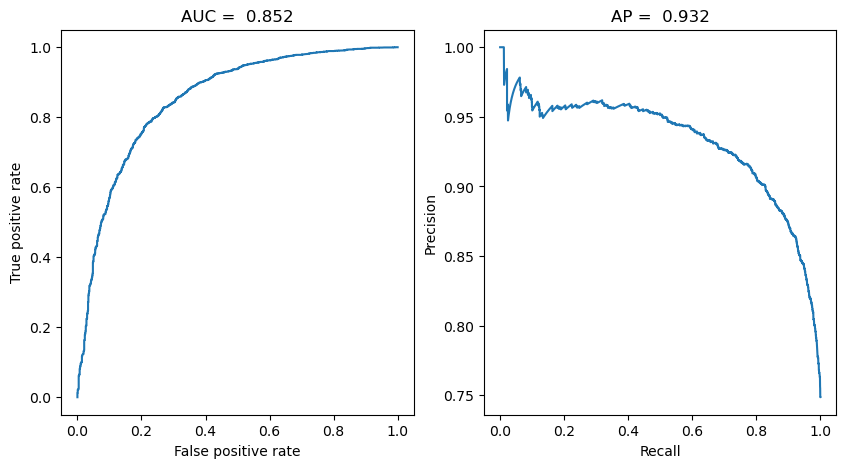

In [64]:
TP_rate_visualization(y_test, nb_prob)

In [65]:
# from sklearn import metrics
# precision, recall, thresholds =metrics.precision_recall_curve(y_test, nb_prob[:,1])
# f1_scores = 2 * recall * precision / (recall + precision)
# best_f1 = np.max(f1_scores)
# best_thresh = thresholds[np.argmax(f1_scores)]

In [66]:
precision1, recall1, thresholds1 = metrics.precision_recall_curve(y_test, nb_prob[:,1])
precision1=precision1.tolist()
precision1.pop()
recall1=recall1.tolist()
recall1.pop()

0.0

In [67]:
Fr={'Precision1':precision1,'Recall1':recall1,'Thresholds1':thresholds1}
df1=pd.DataFrame(Fr)
df1['f1_score1']= (2*(df1['Precision1'] * df1['Recall1']))/(df1['Precision1']+ df1['Recall1'])
dff1=df1.sort_values(by='f1_score1')
dff1

,Precision1,Recall1,Thresholds1,f1_score1
3478,1.000000,0.000341,0.999826,0.000682
3477,1.000000,0.000682,0.999787,0.001364
3476,1.000000,0.001365,0.999738,0.002726
3475,1.000000,0.002047,0.999689,0.004086
3474,1.000000,0.002388,0.999686,0.004765
...,...,...,...,...
510,0.844073,0.947458,0.143017,0.892783
508,0.843864,0.947799,0.142602,0.892817
506,0.843655,0.948141,0.141588,0.892851
511,0.844330,0.947458,0.143663,0.892926


In [68]:
nb_predict_class = [1 if prob > 0.348229 else 0 for prob in nb_prob[:,1]]

In [69]:
confusion_matrix(y_test,nb_predict_class)

array([[ 685,  308],
       [ 431, 2500]], dtype=int64)

In [70]:
print(classification_report(y_test,nb_predict_class))

              precision    recall  f1-score   support

           0       0.61      0.69      0.65       993
           1       0.89      0.85      0.87      2931

    accuracy                           0.81      3924
   macro avg       0.75      0.77      0.76      3924
weighted avg       0.82      0.81      0.82      3924



**Model 3: Logistic Regression with ngram**

In [71]:
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000,class_weight='balanced'))
# running the grid search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
"tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid, cv=5,scoring=ftwo_scorer)
grid.fit(X_train, y_train)
grid_preds=grid.predict(X_test)
# print("Best cross-validation score:{:.2f}".format(grid.best_score_))
# print("Best parameters:{}".format(grid.best_params_))
# print("Model score:{:.2f}".format(grid.score(X_test,y_test)))

In [72]:
grid_prob=grid.predict_proba(X_test)

C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


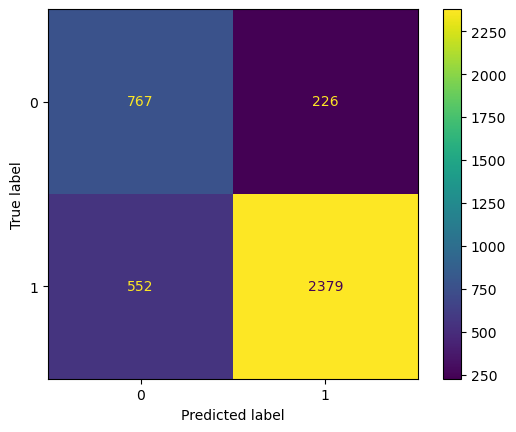

In [73]:
plot_confusion_matrix(grid,X_test,y_test);

In [74]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

           0       0.58      0.77      0.66       993
           1       0.91      0.81      0.86      2931

    accuracy                           0.80      3924
   macro avg       0.75      0.79      0.76      3924
weighted avg       0.83      0.80      0.81      3924



In [75]:
from sklearn import metrics
def TP_rate_visualization(y_test, grid_prob):
  precision, recall, thresholds = metrics.precision_recall_curve(y_test, grid_prob[:,1])
  FPR, TPR, thresholds = metrics.roc_curve(y_test, grid_prob[:,1],)
  AUC = metrics.auc(FPR, TPR)
  AP = metrics.auc(recall, precision)    
  

  plt.figure(figsize=(10,5))

  plt.subplot(1,2,1)
  plt.plot(FPR, TPR)
  plt.title('roc Curve')
  plt.title(f'AUC = {AUC: .3f}')
  plt.ylabel('True positive rate') # TP/(TP+FN)
  plt.xlabel('False positive rate') # FP/(FP+TN)

  plt.subplot(1,2,2)
  plt.plot(recall, precision)
  plt.title(f'AP = {AP: .3f}')
  plt.ylabel('Precision')
  plt.xlabel('Recall')

  plt.show()

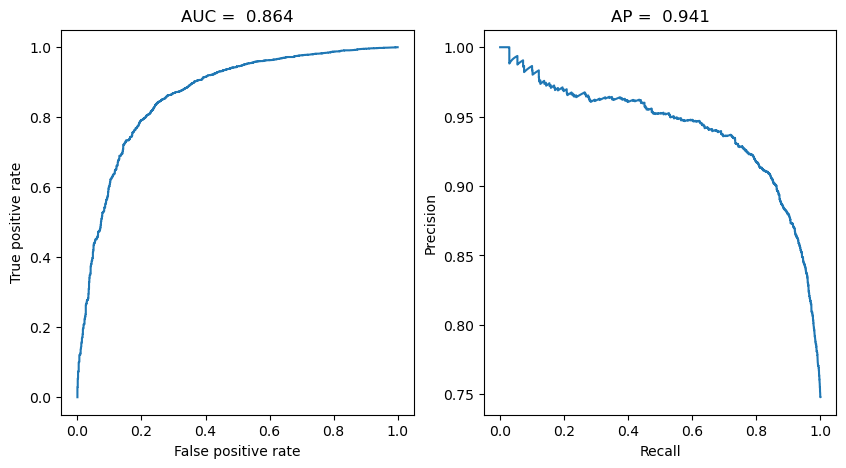

In [76]:
TP_rate_visualization(y_test, grid_prob)